(0.4531219005584717, 0.8541666666666666)
(0.3829123576482137, 0.8854166666666666)
(0.39393357435862225, 0.84375)
(0.2977706591288249, 0.8854166666666666)
(0.4866349697113037, 0.8541666666666666)
(0.28839311997095746, 0.8645833333333334)
(0.26578519741694134, 0.90625)
(0.3921763102213542, 0.90625)
(0.19156314929326376, 0.9270833333333334)
(0.23504249254862467, 0.9270833333333334)


/home/lindenbaum/Documents/Python/DeepLearning/DeepLearning/st_train.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(1,n,figsize= (8,8))


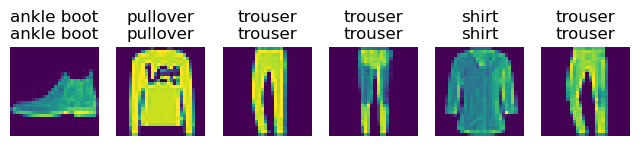

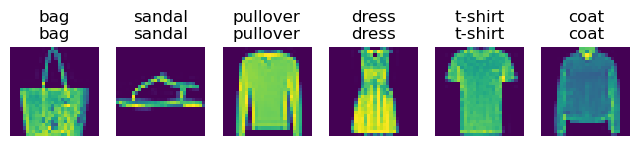

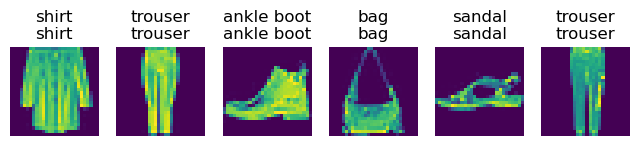

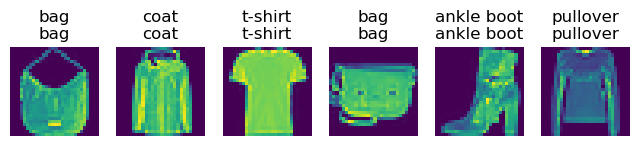

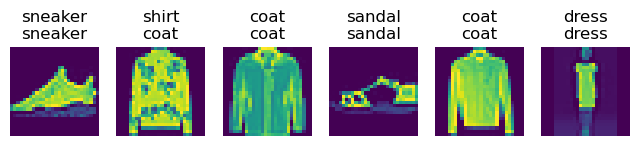

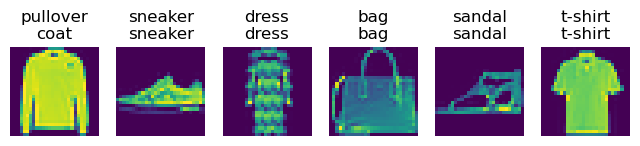

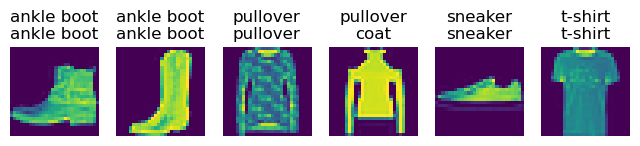

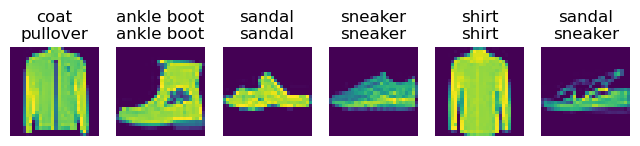

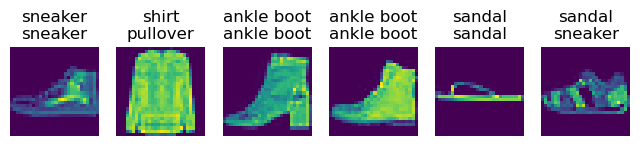

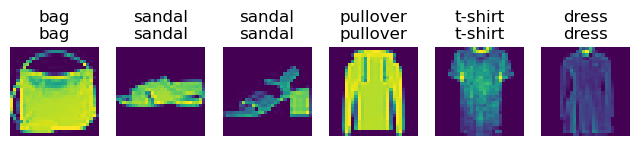

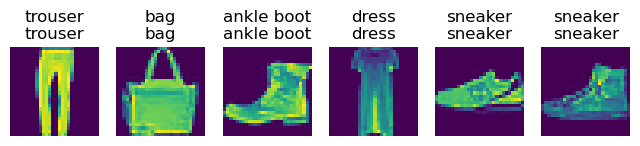

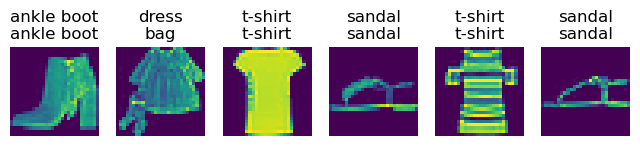

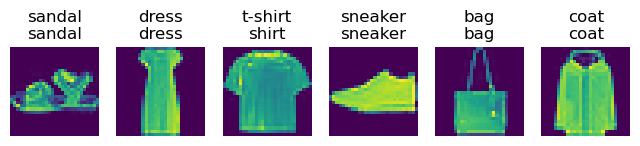

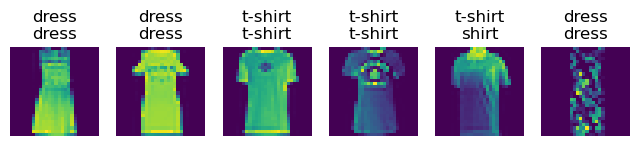

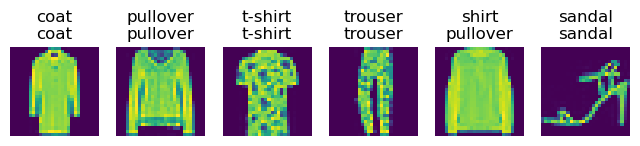

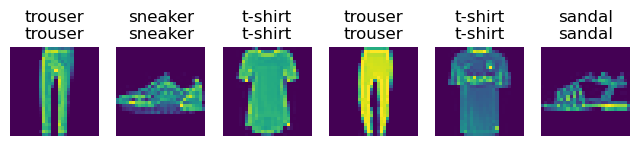

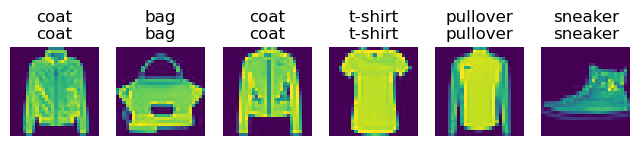

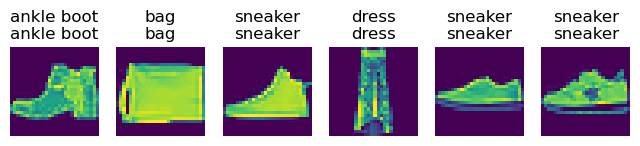

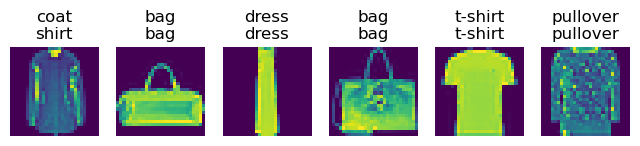

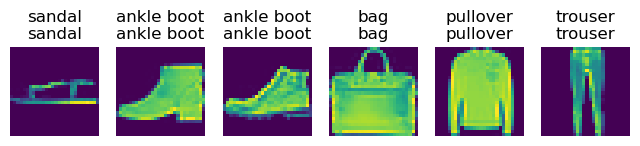

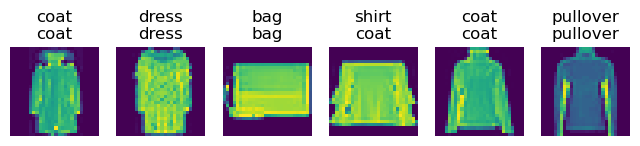

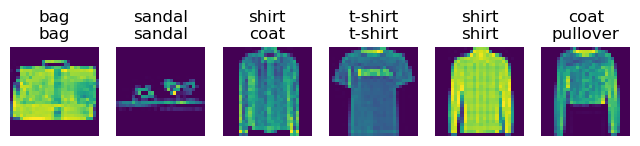

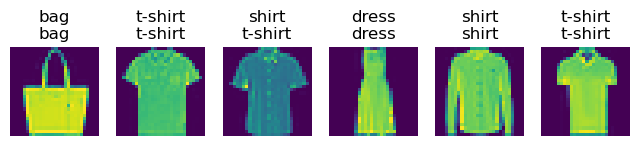

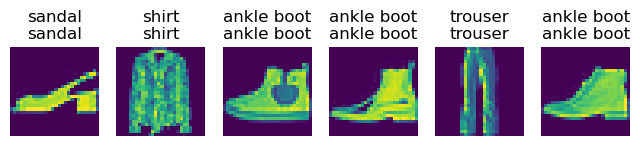

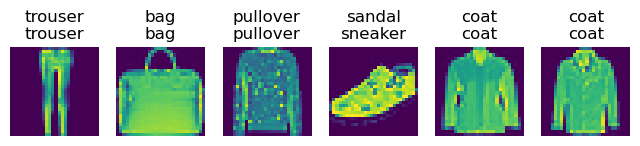

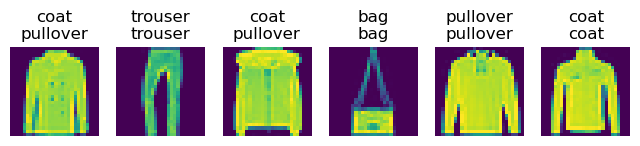

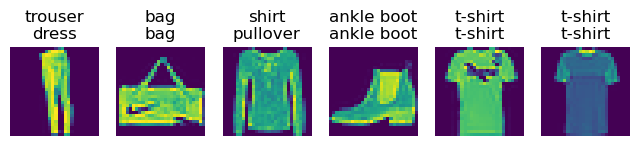

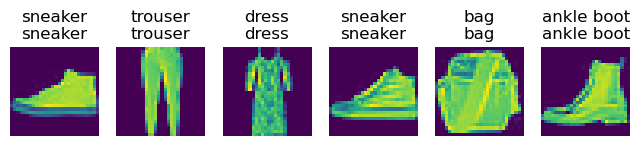

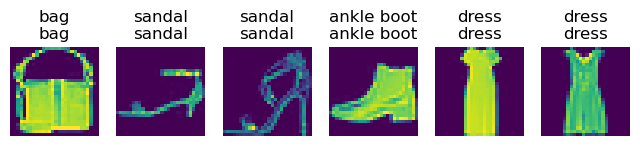

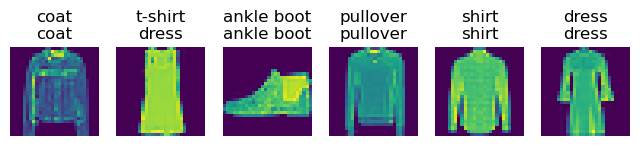

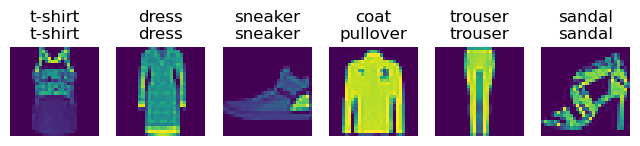

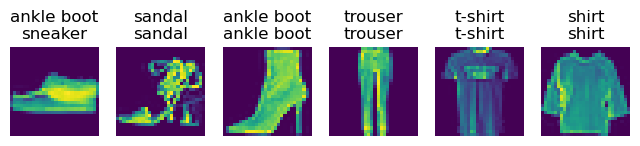

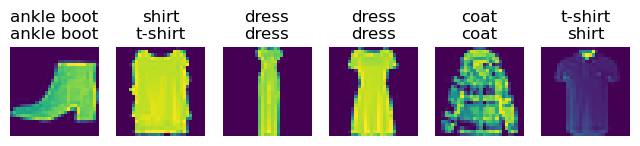

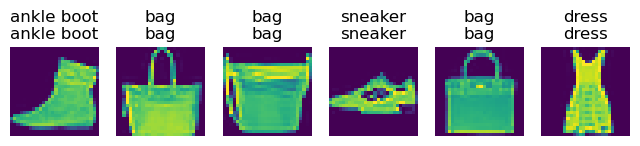

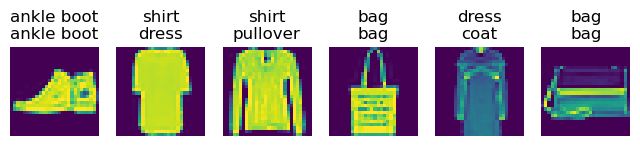

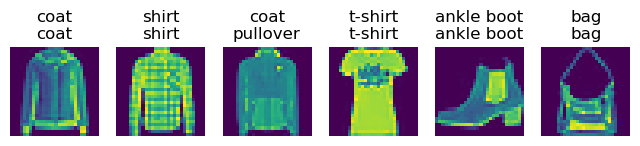

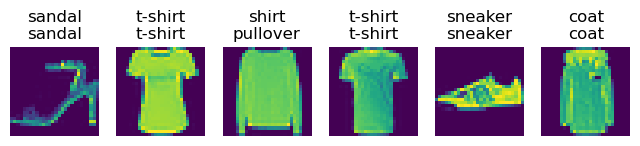

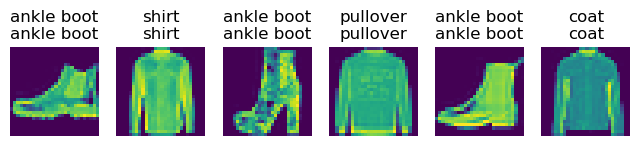

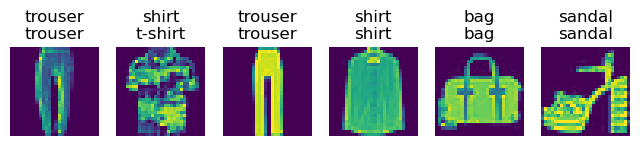

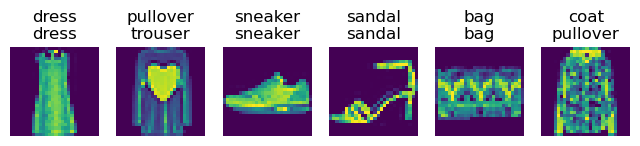

In [1]:
from st_train import *
import sys
import os
import torch
import torchvision
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from torchvision import transforms
num_inputs , num_outputs , num_hiddens= 784, 10 , 256 #定义输入特征数量 输出类别数量 隐藏层中的隐藏单元数
num_epochs = 10
learning_rate = 0.1
batch_size = 256
train_set, test_set =(
            data.DataLoader(torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                                        transform=transforms.ToTensor(),
                                                                        download=True),
                            num_workers=16, batch_size=batch_size, shuffle=True),
            data.DataLoader(torchvision.datasets.FashionMNIST(root='./data', train=False,
                                                                        transform=transforms.ToTensor(),
                                                                        download=True),
                            num_workers=16, batch_size=batch_size, shuffle=False))
"""
定义网络:
先通过展平层
之后是第一层隐藏层,有256个隐藏单元 (这也是一个全连接层)
每通过一个隐藏层,使用一次激活函数ReLU()
最后一个输出层输出,有10个单元 (是一个全连接层)
"""
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,10)
)
def weights_init(m): # 初始化权重矩阵
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, std=0.01)
net.apply(weights_init)
loss_function = nn.CrossEntropyLoss(reduction='none')
updater = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.7)
std_train(net, train_set, test_set, loss_function, num_epochs, updater)
std_prediction(net, test_set, 6)